# **Dataset 3 Notebook**


**Import Satements**

In [280]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

**Loading Data**

In [281]:
# Load the data
df = pd.read_csv('Dataset3.csv')

# Display the columns of the dataset
print("Fields of the dataset:")
print(df.columns)

print('\r\n')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
df.head()



Fields of the dataset:
Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')


First few rows of the dataset:


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,3/23/2019 20:21,3/23/2019 20:27,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,3/4/2019 16:11,3/4/2019 16:19,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,3/27/2019 17:53,3/27/2019 18:00,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,3/10/2019 1:23,3/10/2019 1:49,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,3/30/2019 13:27,3/30/2019 13:37,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


**Feature Engineering**

**Generate Hours from DateTime**

In [282]:
# Convert 'pickup_datetime' to a datetime data type
df['pickup'] = pd.to_datetime(df['pickup'])

# Extract the date, time, and other components
df['hours'] = df['pickup'].dt.hour

df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough', 'hours'],
      dtype='object')

**Removing Unnecessary Features**

In [283]:
df.drop(['pickup', 'dropoff','tip', 'tolls', 'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough'] , inplace=True , axis= 1)
df.columns

Index(['passengers', 'distance', 'fare', 'hours'], dtype='object')

**Data Cleaning**

In [284]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy="mean")
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Display the imputed dataset
df.head()


Missing values in the dataset:
passengers    0
distance      0
fare          0
hours         0
dtype: int64


,passengers,distance,fare,hours
0,1.0,1.60,7.0,20.0
1,1.0,0.79,5.0,16.0
2,1.0,1.37,7.5,17.0
3,1.0,7.70,27.0,1.0
4,3.0,2.16,9.0,13.0


**Display Imputed Dataset Columns**

In [285]:
df.columns


Index(['passengers', 'distance', 'fare', 'hours'], dtype='object')

**Feature Scaling**

In [286]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display the scaled dataset
df.head()

,passengers,distance,fare,hours
0,-0.448004,-0.372199,-0.527324,1.009434
1,-0.448004,-0.583821,-0.700471,0.350377
2,-0.448004,-0.432289,-0.484038,0.515141
3,-0.448004,1.221502,1.204142,-2.121086
4,1.213575,-0.225892,-0.354178,-0.143916


**Data Visualization**



1. Frequency Distribution for Hours




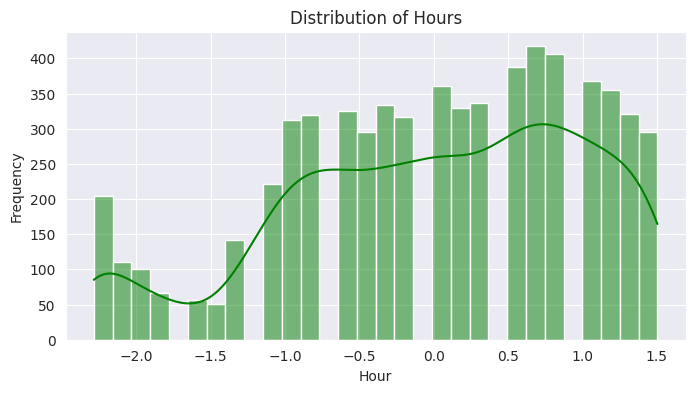

In [287]:
# Visualize the distribution of 'hours'
plt.figure(figsize=(8, 4))
sns.set_style(style='darkgrid')
sns.histplot(df['hours'], bins=30, kde=True, color='green')
plt.title('Distribution of Hours')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show()


1. Distance versus Fare

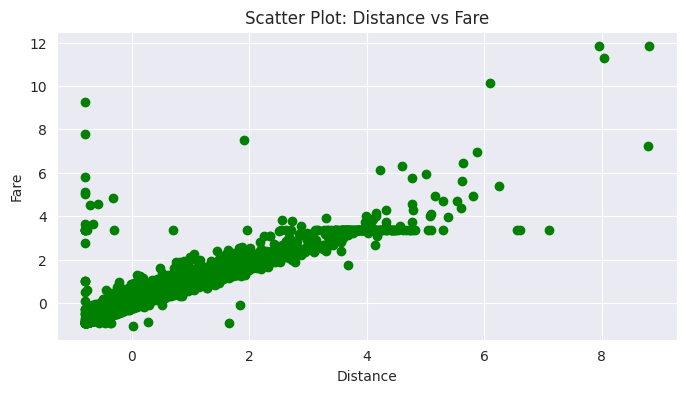

In [288]:
plt.figure(figsize=(8, 4))
plt.scatter(df['distance'], df['fare'], color = 'green')
plt.xlabel("Distance")
plt.ylabel("Fare")
plt.title('Scatter Plot: Distance vs Fare')
plt.show()

**Models and Evaluation**

 **1. Linear Regression Model**

Split Data into Train and Test Sets

In [289]:
# Split the data into train and test sets
X = df.drop(columns=['fare'])
y = df['fare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train Linear Regression Model

In [290]:
from sklearn.linear_model import LinearRegression

# Train the linear regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)


LinearRegression()

Predictions and Model Evaluation

In [291]:
# Make predictions on the test set
y_pred_lr = model_lr.predict(X_test)

# Calculate evaluation metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"R-squared (R2): {r2_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")


Mean Squared Error (MSE): 0.16
Mean Absolute Error (MAE): 0.17
R-squared (R2): 0.83
Root Mean Squared Error (RMSE): 0.40


**2. Random Rainforest Regressor**

**Split Data into Train and Test Sets:** Random Rainforest Regressor and Gradient Boosting Regression



In [292]:
# Split the data into train and test sets
X = df.drop(columns=['fare'])
y = df['fare'].values.ravel() # Reshape y to a 1D array
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train Random Rainforest Regressor Model

In [293]:
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Predictions and Model Evaluation

In [294]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest - Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Random Forest - R-squared (R2): {r2_rf:.2f}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf:.2f}")


Random Forest - Mean Squared Error (MSE): 0.16
Random Forest - Mean Absolute Error (MAE): 0.17
Random Forest - R-squared (R2): 0.83
Random Forest - Root Mean Squared Error (RMSE): 0.40


**3. Gradient Boosting Regression**

Train Gradient Boosting Regression Model

In [295]:
# Train a Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

Predictions and Model Evaluation

In [296]:
# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Calculate evaluation metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)

print(f"Gradient Boosting - Mean Squared Error (MSE): {mse_gb:.2f}")
print(f"Gradient Boosting - Mean Absolute Error (MAE): {mae_gb:.2f}")
print(f"Gradient Boosting - R-squared (R2): {r2_gb:.2f}")
print(f"Gradient Boosting - Root Mean Squared Error (RMSE): {rmse_gb:.2f}")


Gradient Boosting - Mean Squared Error (MSE): 0.14
Gradient Boosting - Mean Absolute Error (MAE): 0.15
Gradient Boosting - R-squared (R2): 0.86
Gradient Boosting - Root Mean Squared Error (RMSE): 0.37


**Model Prediction Comparisons**

In [297]:
# Create a DataFrame with actual and predicted values
actual_vs_predicted = pd.DataFrame({
    'Actual': y_test[:20],  # Display the first 20 rows
    'Random Forest Predicted': y_pred_rf[:20],
    'Gradient Boosting Predicted': y_pred_gb[:20],
    'Linear Regression Predicted': y_pred_lr[:20]
})

# Display the table
print(actual_vs_predicted.to_string(index=False))

   Actual  Random Forest Predicted  Gradient Boosting Predicted  Linear Regression Predicted
-0.354178                -0.278768                    -0.410232                    -0.404411
-0.397464                -0.460410                    -0.489911                    -0.373000
 0.078689                -0.216526                    -0.192329                    -0.136550
-0.224318                -0.339852                    -0.282051                    -0.258176
-0.137744                -0.137528                    -0.139196                    -0.137597
 1.074282                 0.306922                     0.450958                     0.306734
-0.657184                -0.628168                    -0.546594                    -0.527234
 0.381695                 0.170213                     0.062884                    -0.050727
-0.007884                 0.177606                     0.043351                    -0.057029
-0.873617                -0.845257                    -0.742646       

**Data Visualization: Actual vs Predicted Fare**

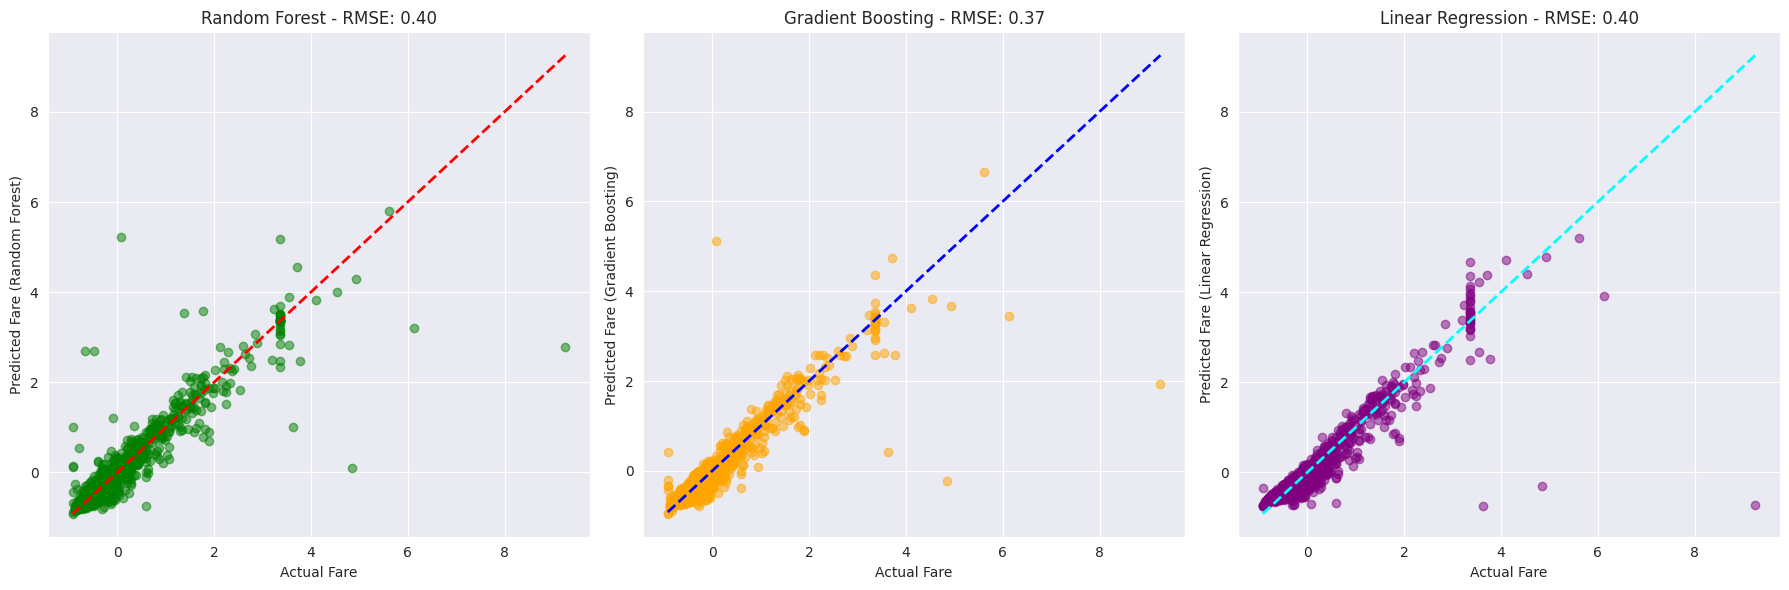

In [298]:
# Data visualization: Actual vs Predicted
plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare (Random Forest)')
plt.title(f'Random Forest - RMSE: {rmse_rf:.2f}')

plt.subplot(132)
plt.scatter(y_test, y_pred_gb, color='orange', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='blue', linewidth=2)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare (Gradient Boosting)')
plt.title(f'Gradient Boosting - RMSE: {rmse_gb:.2f}')

plt.subplot(133)
plt.scatter(y_test, y_pred_lr, color='purple', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='cyan', linewidth=2)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare (Linear Regression)')
plt.title(f'Linear Regression - RMSE: {rmse_lr:.2f}')

plt.tight_layout()
plt.show()